# Option Charts
> Tool for drawing option payoff charts.

- toc: true
- branch: master
- badges: true
- comments: true
- author: Stephen Zagar
- categories: [peak6, options, tools]

## Payoff Calculations

In [43]:
def short_call(premium: float,strike: float, uprices: list[float], multiplier=1, label: str = "short call"):
    payoff = [min(premium*multiplier, -(i - strike-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [88]:
def long_call(premium: float, strike: float, uprices: list[float], multiplier=1, label: str = "long call"):
    payoff = [max(-premium*multiplier, (i-strike-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [116]:
def long_put(premium: float,strike: float, uprices: list[float], multiplier=1, label: str = "long put"):
    payoff = [max(-premium*multiplier, (strike-i-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [117]:
def short_put(premium: float,strike: float, uprices: list[float], multiplier=1, label: str = "short put"):
    payoff = [min(premium*multiplier, -(strike-i-premium)*multiplier) for i in uprices]
    return { 'payoff': payoff, 'label': label}

In [118]:
def long_underlying(strike: float, uprices: list[float], multiplier=1, label:str = "long underlying"):
    payoff = [(i-strike)*multiplier for i in uprices]
    label = "long underlying"
    return { 'payoff': payoff, 'label': label}

## Plotting

In [128]:
def plot_strategy_payoff(name: str, legs: {list, str}):
    payoffs = [leg['payoff'] for leg in legs]
    strategy_payoff = np.sum(payoffs,axis=0)

    plt.figure(figsize=(20,11))
    for leg in legs:
        plt.plot(uprices, leg['payoff'], label=leg['label'])
    plt.plot(uprices, strategy_payoff, label=name, linewidth=2)
    
    plt.legend(fontsize = 20)
    plt.xlabel('Underlying Price at Expiry',fontsize = 15)
    plt.ylabel('Payoff',fontsize = 15)
    plt.title(f'{name} Strategy Payoff at Expiration',fontsize = 20)
    plt.grid(True)

## Examples

In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
call_price = 10
put_price = 10

# prices of underlying at expiration date
uprices = np.arange(110,230,1)

#### Long Call

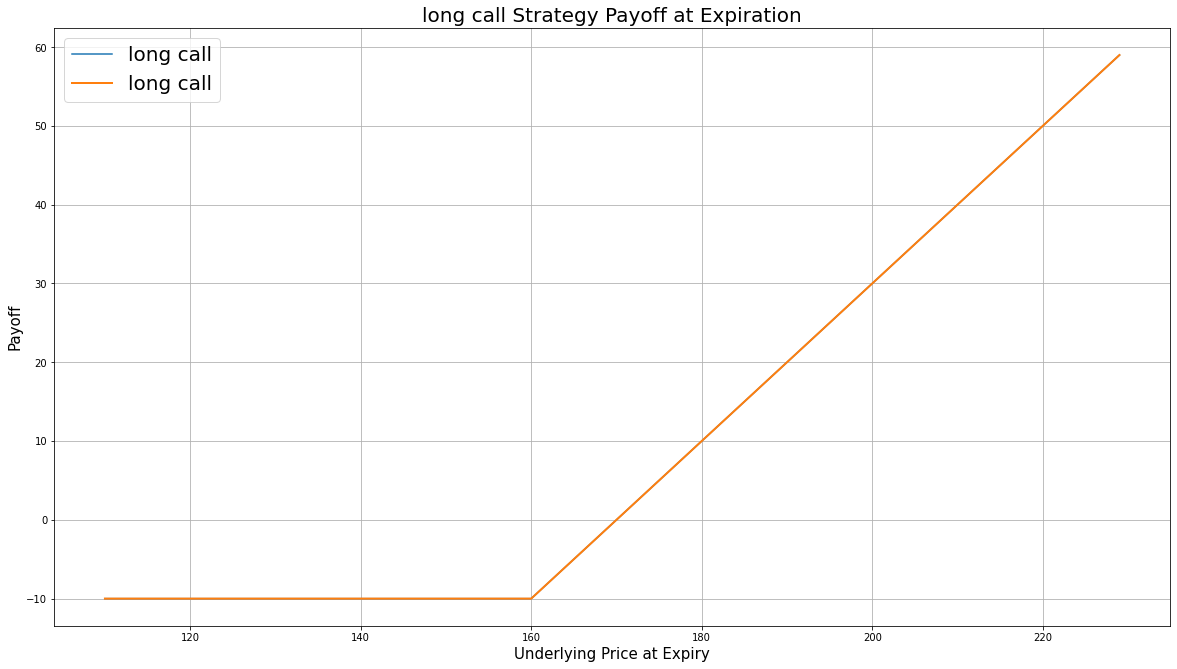

In [131]:
legs = []
legs.append(long_call(premium=call_price, strike = 160, uprices = uprices))

plot_strategy_payoff('long call', legs)

#### Short Call

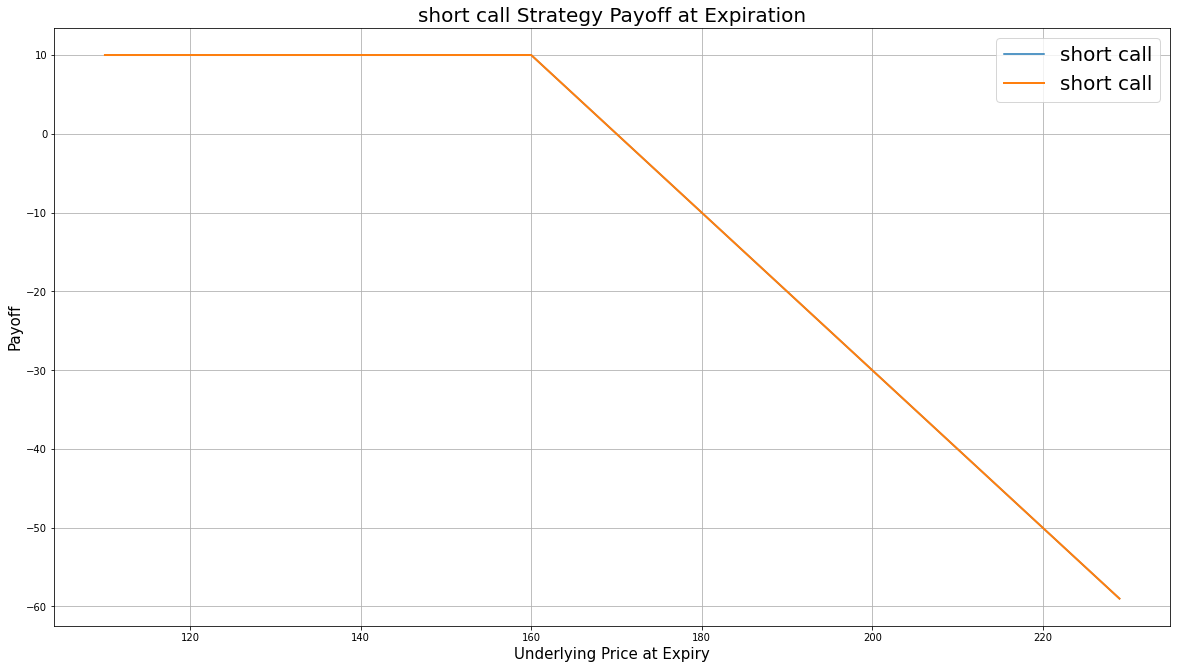

In [132]:
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices))

plot_strategy_payoff('short call', legs)

#### Long Put

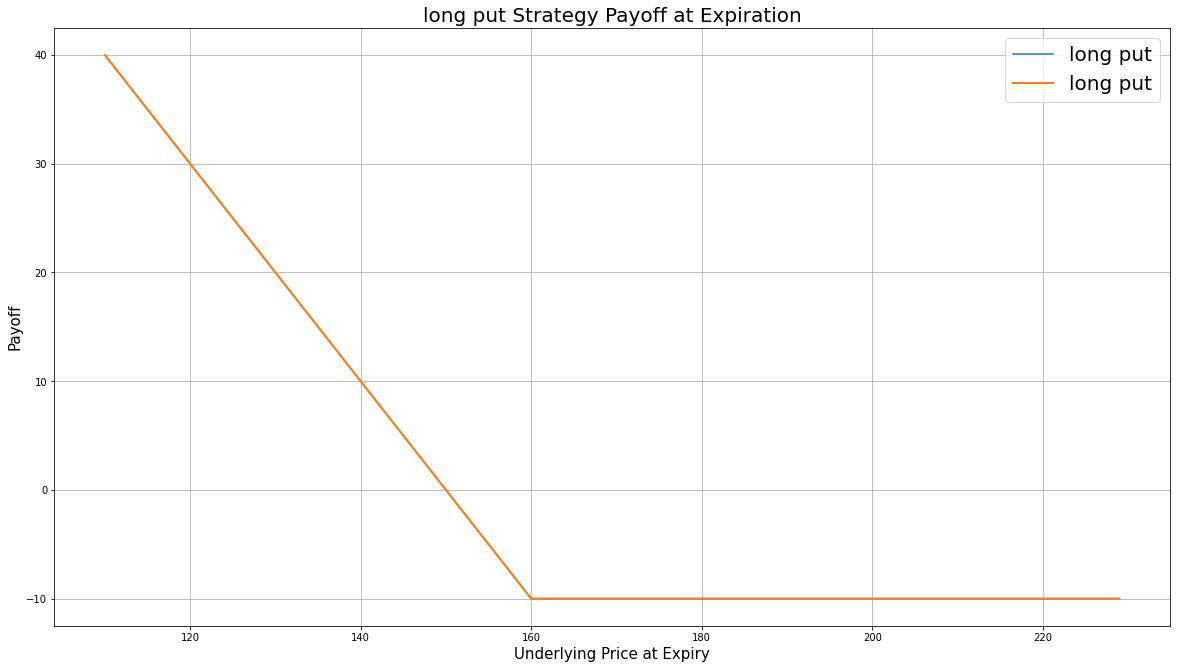

In [133]:
legs = []
legs.append(long_put(premium=put_price, strike = 160, uprices = uprices))

plot_strategy_payoff('long put', legs)

#### Short Put

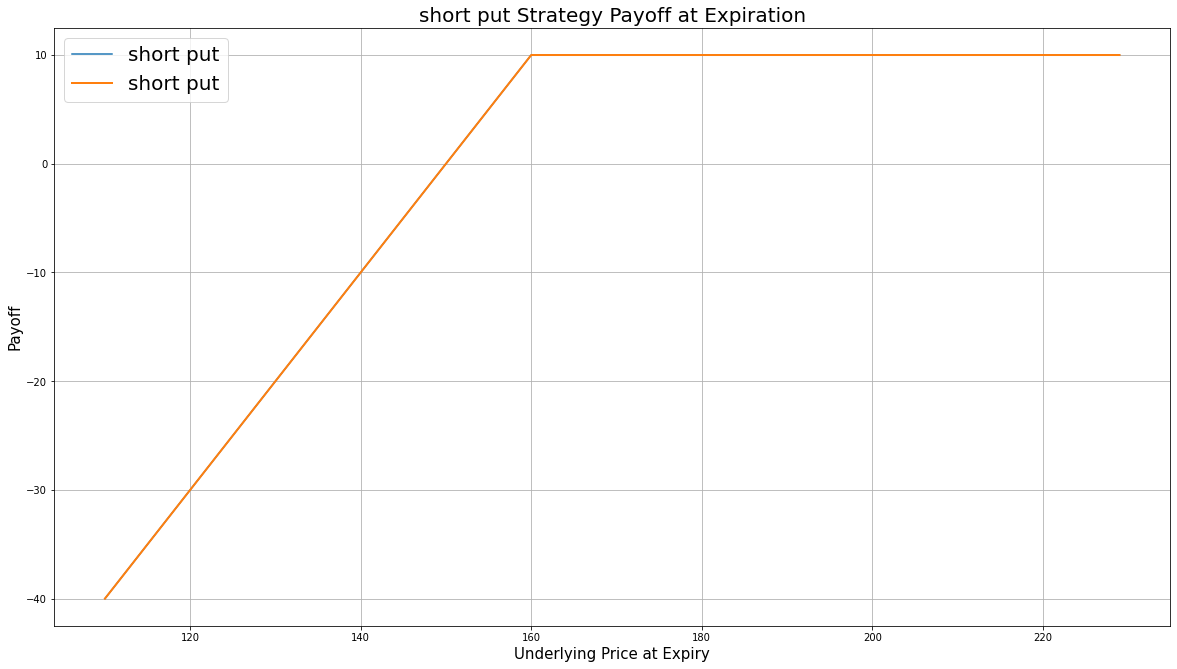

In [134]:
legs = []
legs.append(short_put(premium=put_price, strike = 160, uprices = uprices))

plot_strategy_payoff('short put', legs)

#### Covered Call

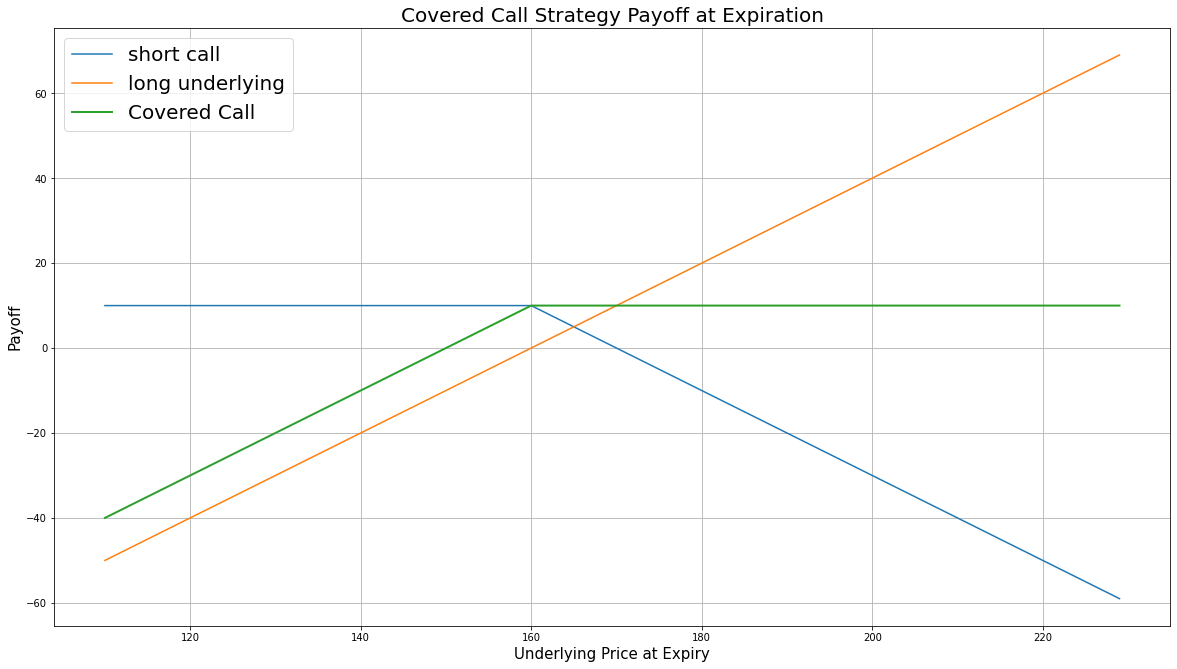

In [135]:
strategy_name = 'Covered Call'
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices))
legs.append(long_underlying(strike = 160, uprices = uprices))

plot_strategy_payoff(strategy_name, legs)

## Strangles

### Long strangle
involve buying a call with a higher strike price and buying a put with a lower strike price. For example, buy a 105 Call and buy a 95 Put. Long straddles, however, involve buying a call and put with the same strike price. For example, buy a 100 Call and buy a 100 Put.


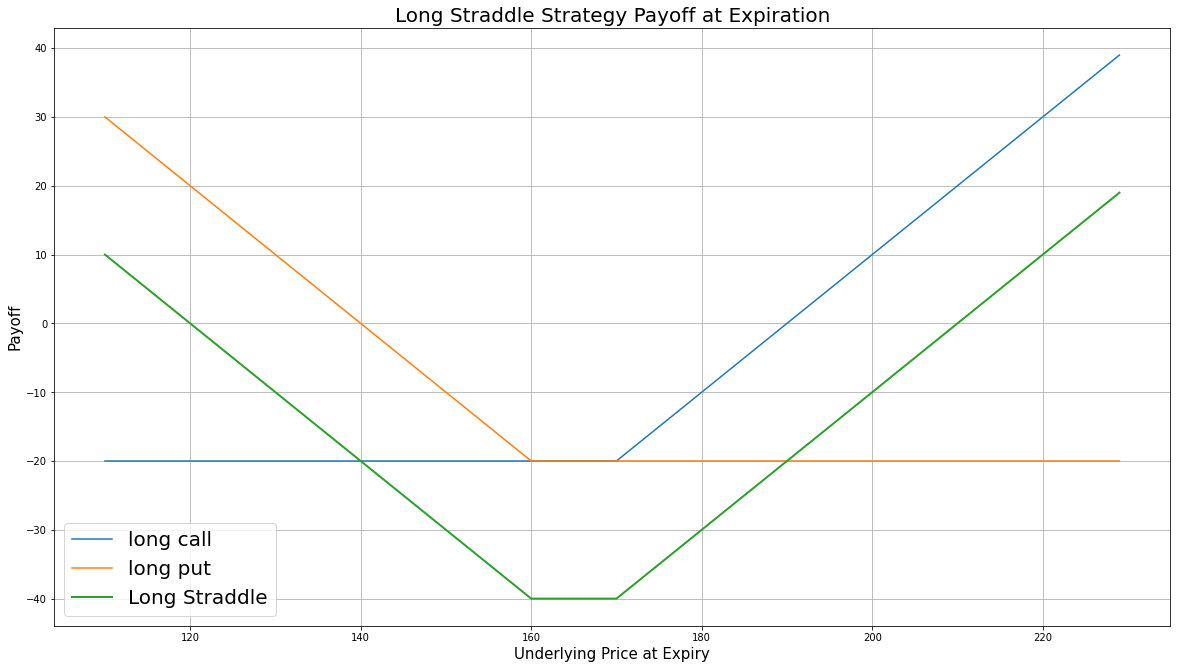

In [136]:
call_strike = 170
put_strike = 160

call_price = 20
put_price = 20

legs = []
legs.append(long_call(premium=call_price, strike = call_strike, uprices = uprices))
legs.append(long_put(premium=put_price, strike = put_strike, uprices = uprices))

plot_strategy_payoff("Long Straddle", legs)

#### Short Strangle
Sell 1 XYZ 105 call at	1.50
Sell 1 XYZ 95 put at	1.30
Net credit =	2.80

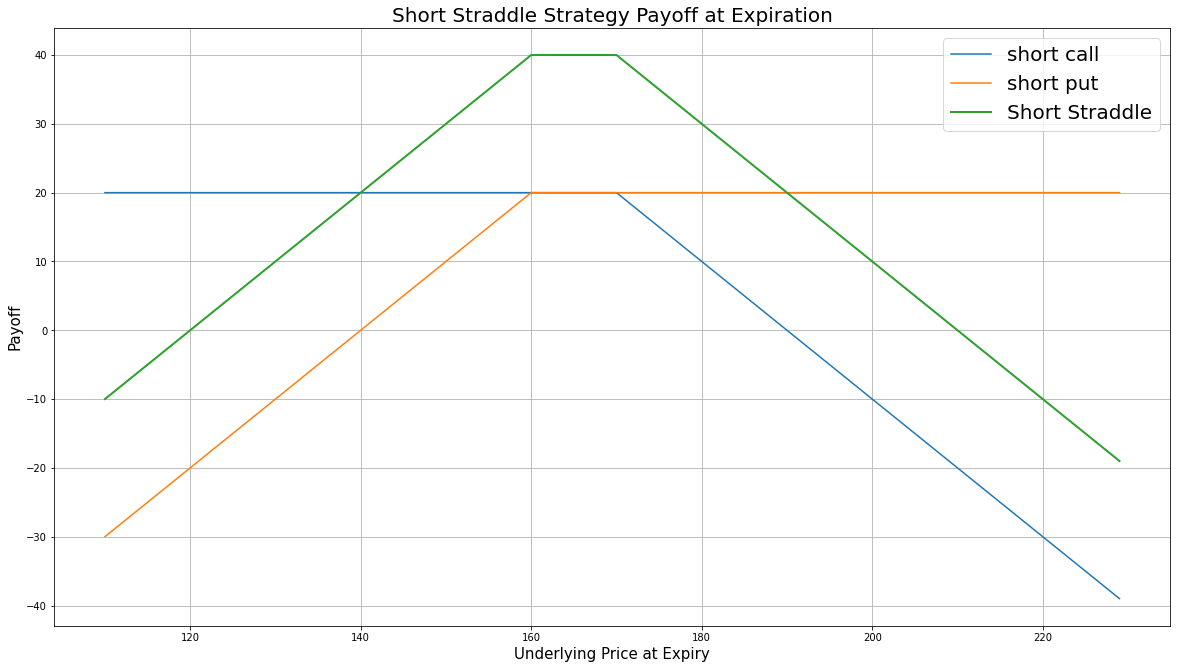

In [137]:
call_strike = 170
put_strike = 160

call_price = 20
put_price = 20

legs = []
legs.append(short_call(premium=call_price, strike = call_strike, uprices = uprices))
legs.append(short_put(premium=put_price, strike = put_strike, uprices = uprices))

plot_strategy_payoff("Short Straddle", legs)

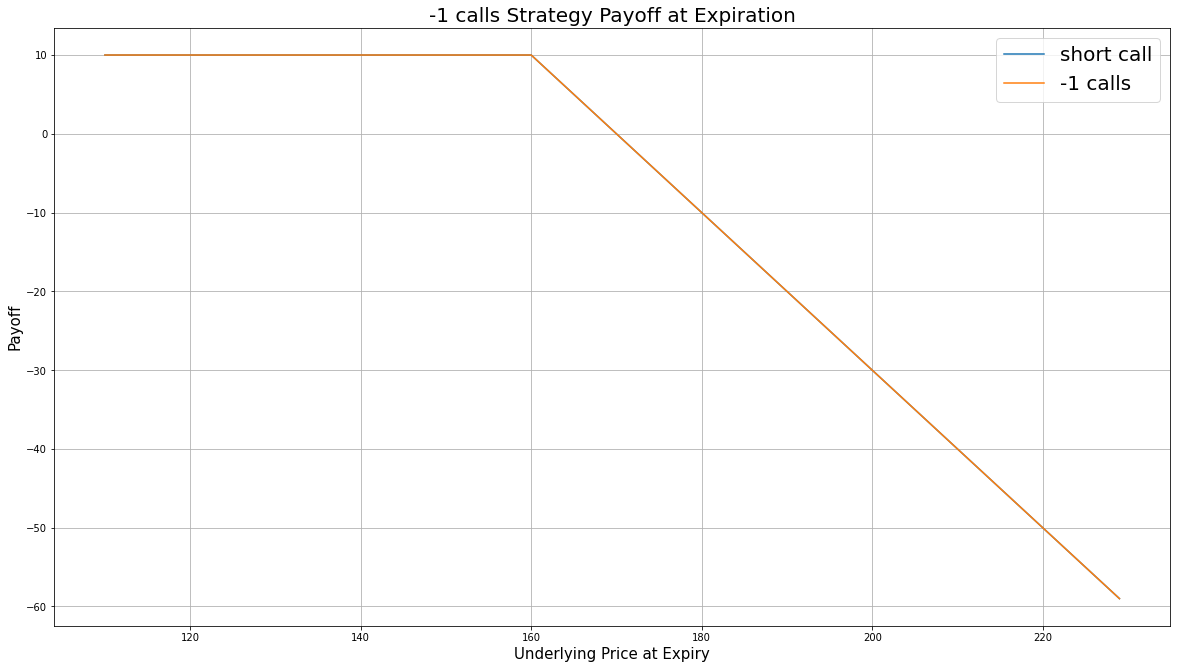

In [36]:
strategy_name = '-1 calls'
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices, multiplier=1))

plot_strategy_payoff(strategy_name, legs)

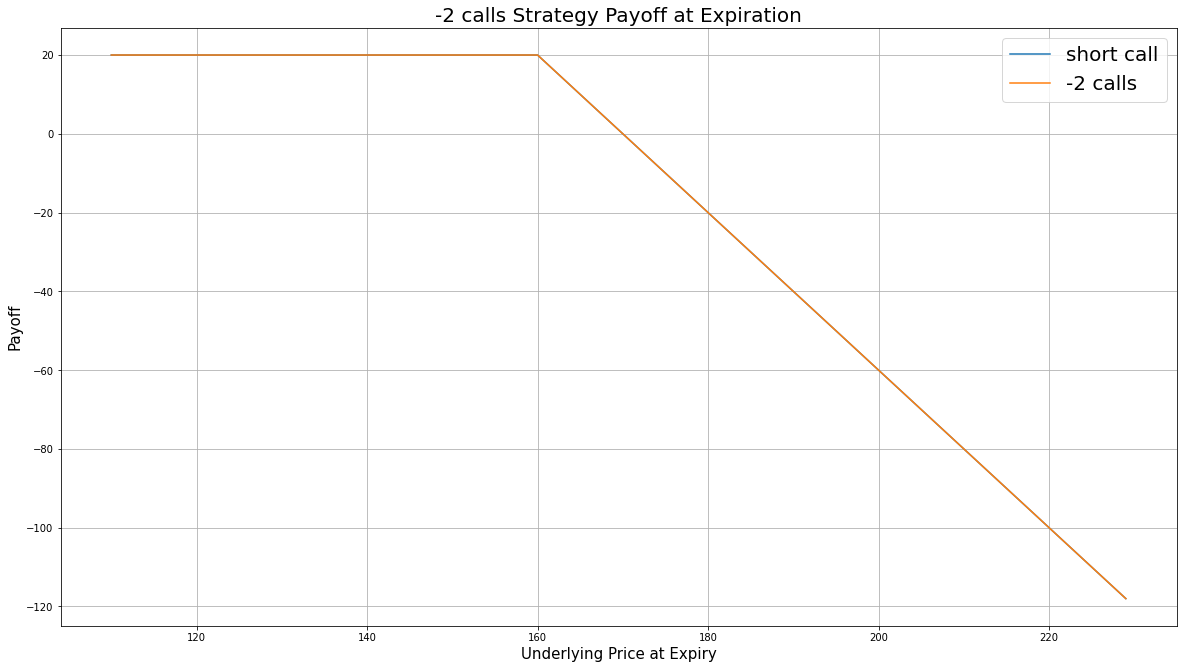

In [40]:
strategy_name = '-2 calls'
legs = []
legs.append(short_call(premium=call_price, strike = 160, uprices = uprices, multiplier=2))

plot_strategy_payoff(strategy_name, legs)